### Lab5. Diabetes Classification using Logistic Regression
### Step1. [Understand Data]. Using Pandas, import “diabetes.csv” file and print properties such as head, shape, columns, dtype, info and value_counts. 

In [2]:
import pandas as pd
import csv

In [3]:
diab=pd.read_csv("diabetes.csv")
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diab.shape

(768, 9)

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
f = df.columns
f

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

### Step2. [Build Logistic Regression Model] 
#### Prepare X matrix (8 feature columns) and y vector (ie., Outcome column) 

In [12]:
X=df.drop("Outcome", axis=1)
y=df[["Outcome"]]

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


#### Split dataset with stratified shuffle split for training and testing as X_train, X_test, y_train, y_test (use 25% test size). 

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
StratifiedShuffleSplit()
shuf = StratifiedShuffleSplit(n_splits=4, test_size=0.25,random_state=0)

In [17]:
shuf.get_n_splits(X,y)

4

#### Create LogisticRegression model, fit on training set and predict on test set

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
for train, test in shuf.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()

In [22]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_predic = logmodel.predict(X_test)
y_predic

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [24]:
logmodel.score(X_train,y_train)

0.7899305555555556

### Step3. [Predict on a new sample] 
#### Will this person become diabetic?. His details are given below. 
#### new_person = [[6, 200, 90, 10, 25, 23.3, 0.672, 42]] 

In [25]:
new_person = [[6, 200, 90, 10, 25, 23.3, 0.672, 42]]

In [26]:
print(logmodel.predict(new_person))

[1]


### Step3. [Compute Classification Metrics] 
#### Compute and print Accuracy, Precision, Recall and AUC scores

### Precision

In [27]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_predic))

0.6727272727272727


### Recall

In [28]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_predic))

0.5522388059701493


### Accuracy

In [29]:
from sklearn.metrics import accuracy_score
log_acscore=accuracy_score(y_test, y_predic)

In [30]:
log_acscore

0.75

### AUC scores

In [31]:
from sklearn.metrics import roc_auc_score

In [33]:
print(roc_auc_score(y_test, y_predic))

0.7041194029850747


### Step4. [Understand Correlation] 
#### Create confusion matrix between y_test and y_pred and plot confusion matrix values in a Heatmap. Explain the meaning of the 4 numbers you get. 

In [35]:
from sklearn.metrics import confusion_matrix
confu_matrix=confusion_matrix(y_test, y_predic)
confu_matrix

array([[107,  18],
       [ 30,  37]], dtype=int64)

In [37]:
confu_accu_score = accuracy_score(y_test, y_predic)
confu_accu_score 

0.75

<AxesSubplot:>

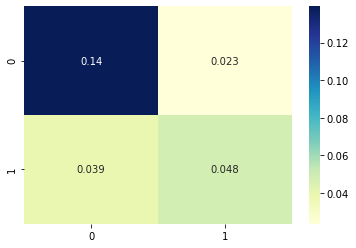

In [38]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predic) / len(y), cmap='YlGnBu', annot=True)

### Step5. [Normalization using MinmaxScaler and rebuild LoR] 
#### Now, normalize your X_train and X_test values using MinmaxScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trained_min = scaler.fit_transform(X_train)
X_tested_min = scaler.transform(X_test)

In [40]:
X_trained_min.shape

(576, 8)

In [41]:
X_tested_min.shape 

(192, 8)

#### Create a new LogisticRegression model, fit on normalized training set and predict on the normalized test set 

In [42]:
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression()

In [44]:
logmodel1.fit(X_trained_min, y_train)

LogisticRegression()

In [45]:
y_predict = logmodel1.predict(X_tested_min)
y_predict

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
logmodel1.score(X_trained_min, y_train)

0.7899305555555556

### Compute and print Accuracy, Precision, Recall and AUC scores 

### Precision

In [47]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_predict))

0.673469387755102


### Recall 

In [49]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_predict))

0.4925373134328358


### Accuracy

In [50]:
from sklearn.metrics import accuracy_score
min_accscore=accuracy_score(y_test, y_predict)

In [51]:
min_accscore

0.7395833333333334

### AUC scores

In [52]:
from sklearn.metrics import roc_auc_score

In [56]:
log_auc_sc=roc_auc_score(y_test, y_predict)
log_auc1=('LoR minmax, AUC=',log_acscore)
log_auc1

('LoR minmax, AUC=', 0.75)

### Step6. [Normalization using StandardScaler and rebuild LoR]
#### Repeat Step5 with StandardScaler 

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trained_stand = scaler.fit_transform(X_train)
X_tested_stand = scaler.transform(X_test)

In [59]:
X_trained_stand.shape

(576, 8)

In [60]:
X_tested_stand.shape

(192, 8)

In [61]:
from sklearn.linear_model import LogisticRegression
logmodel2 = LogisticRegression()

In [63]:
logmodel2.fit(X_trained_stand, y_train)

LogisticRegression()

In [66]:
y_predict_stand = logmodel2.predict(X_tested_stand)
y_predict_stand

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
logmodel2.score(X_trained_stand, y_train)

0.7795138888888888

### Precision score

In [68]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_predict_stand))

0.6851851851851852


### Recall score

In [69]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_predict_stand))

0.5522388059701493


### Accuracy

In [70]:
from sklearn.metrics import accuracy_score
stand_accscore=accuracy_score(y_test, y_predict_stand)

In [71]:
stand_accscore

0.7552083333333334

### AUC score

In [72]:
from sklearn.metrics import roc_auc_score

In [73]:
stand_aucscore=roc_auc_score(y_test, y_predict_stand)
stand_auc3=('AUC=',stand_aucscore)
stand_auc3

('AUC=', 0.7081194029850746)

### Among the 3 models, which model gives better classification scores?

In [74]:
print('Logistic Regression Model:',log_acscore)
print('MinmaxScaler:',min_accscore)
print('StandardScaler:',stand_accscore)

Logistic Regression Model: 0.75
MinmaxScaler: 0.7395833333333334
StandardScaler: 0.7552083333333334


### Step7. [Plot ROC curve]
#### Plot ROC curve as shown below. You can use the MinmaxScaler scaled values of X_test for computing predict_proba() score.¶

In [75]:
from sklearn.metrics import roc_curve

In [77]:
pred_prb3 = logmodel1.predict_proba(X_tested_min)
fprb3, tprb3, threshold3 = roc_curve(y_test,pred_prb3[:,1], pos_label=1)

Text(0, 0.5, 'True Positive Rate')

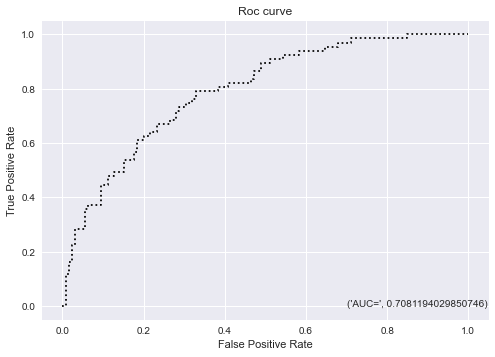

In [78]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.annotate(xy=[0.7,0], s=stand_auc3)
plt.plot(fpr1, tpr1, linestyle=':', color='black',label='Logistic Regression')
plt.title('Roc curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Step8. [Comparison with KNN classifier].
#### Create a KNN classifier with default values, fit on the scaled X using MinmaxScaler, predict and print classification metric scores.

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
logmodel3 = KNeighborsClassifier(n_neighbors=3)

In [81]:
logmodel3.fit(X_trained_min,y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
knn_y_pred = logmodel3.predict(X_tested_min)
knn_y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

### Precision score

In [83]:
from sklearn.metrics import precision_score
print(precision_score(y_test, knn_y_pred))

0.6271186440677966


### Recall score

In [84]:
from sklearn.metrics import recall_score
print(recall_score(y_test, knn_y_pred))

0.5522388059701493


### Accuracy

In [85]:
from sklearn.metrics import accuracy_score
knn_accscore=accuracy_score(y_test, knn_y_pred)
knn_accscore

0.7291666666666666

### AUC score

In [87]:
from sklearn.metrics import roc_auc_score
knn_aucscore=roc_auc_score(y_test, knn_y_pred)
knn_auc2=('KNN minmax, AUC=',knn_aucscore)
knn_auc2

('KNN minmax, AUC=', 0.6881194029850747)

### Step9. [Update ROC curve]
#### Update your ROC curve, this time, with one more curve of KNN classifier

In [89]:
pred_prb2 = logmodel3.predict_proba(X_tested_min)
fprb3,tprb3,threshold1 = roc_curve(y_test, pred_prb3[:,1],pos_label=1)
fprb2,tprb2,threshold2 = roc_curve(y_test, pred_prb2[:,1],pos_label=1)

Text(0, 0.5, 'True positive rate')

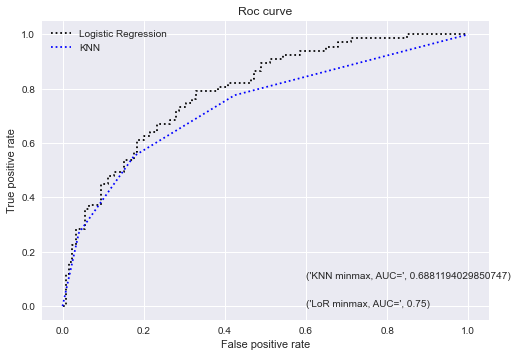

In [91]:
plt.plot(fprb3,tprb3,linestyle=':',color='black',label='Logistic Regression')
plt.plot(fprb2,tprb2,linestyle=':',color ='blue',label='KNN')
plt.annotate(xy=[0.6,0.1], s=knn_auc2)
plt.annotate(xy=[0.6,0], s=log_auc1)
plt.legend(loc='best')
plt.title('Roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Step10. [Regularization]
#### In order to reduce overfitting of your data, you will use LogisticRegressionCV model with L1 and L2 regularization parameters. Create both models using the following statements

In [92]:
from sklearn.linear_model import LogisticRegressionCV

In [93]:
logmodel4 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear')
logmodel5 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2')

#### Perform fit using MinmaxScaler scaled values and predict¶

In [94]:
print(logmodel4.fit(X_trained_min,y_train))
print(logmodel5.fit(X_trained_min,y_train))

LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')
LogisticRegressionCV(cv=4)


In [97]:
logrg_y_pred5 = logmodel4.predict(X_tested_min)
logrg_y_pred6 = logmodel5.predict(X_tested_min)
print('Logistic RegressionCV L1:\n',logrg_y_pred5)
print('#############################################################################################')
print('Logistic RegressionCV L2:\n',logrg_y_pred6)

Logistic RegressionCV L1:
 [0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0]
#############################################################################################
Logistic RegressionCV L2:
 [0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0]


In [98]:
from sklearn.metrics import roc_auc_score
logrgpred_auc=roc_auc_score(y_test,logrg_y_pred5)
logrgpred4_auc=('LoR L1 minmax, AUC=',logrgpred_auc)
logrgpred4_auc

('LoR L1 minmax, AUC=', 0.6748059701492537)

In [99]:
from sklearn.metrics import roc_auc_score
logrgpred_auc1=roc_auc_score(y_test, logrg_y_pred6)
logrgpred5_auc=('LoR L2 minmax, AUC=',logrgpred_auc1)
logrgpred5_auc

('LoR L2 minmax, AUC=', 0.6931940298507463)

### Step11. [Update ROC curve]
#### Update your ROC curve, this time, with two more curves

In [101]:
pred_prb7 = logmodel4.predict_proba(X_tested_min)
pred_prb8 = logmodel5.predict_proba(X_tested_min)
fprb2,tprb2,threshold2 = roc_curve(y_test, pred_prb2[:,1],pos_label=1)
fprb3,tprb3,threshold1 = roc_curve(y_test, pred_prb3[:,1],pos_label=1)
fprb5,tprb5,thresh3 = roc_curve(y_test, pred_prb7[:,1],pos_label=1)
fprb6,tprb6,thresh4 = roc_curve(y_test, pred_prb8[:,1],pos_label=1)

Text(0, 0.5, 'True  Positive Rate')

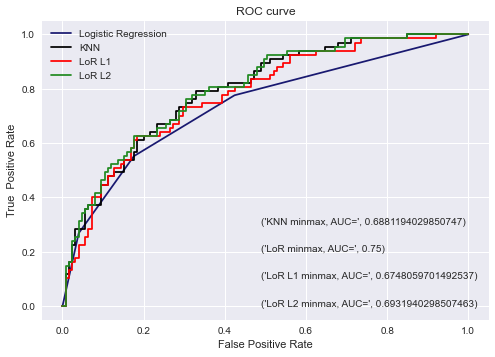

In [102]:
plt.plot(fprb2,tprb2,linestyle='-',color='midnightblue', label='Logistic Regression')
plt.plot(fprb3,tprb3,linestyle='-',color='black', label='KNN')
plt.plot(fprb5,tprb5,linestyle='-',color='red', label='LoR L1')
plt.plot(fprb6,tprb6,linestyle='-',color='forestgreen', label='LoR L2')
plt.annotate(xy=[0.49,0.3], s=knn_auc2)
plt.annotate(xy=[0.49,0.2], s=log_auc1)
plt.annotate(xy=[0.49,0.1], s=logrgpred4_auc)
plt.annotate(xy=[0.49,0], s=logrgpred5_auc)
plt.legend(loc='best')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')